In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

# 티켓 데이터 불러오기

In [2]:
ticket = pd.read_csv('myticket.csv')
ticket.sample(3)

,category,title,date,theater,price,platform,Unnamed: 6
168,musical,살리에르,2014-08-31,세종M씨어터,46200,interpark,NaN
14,musical,쓰릴 미,2011-12-31,충무아트센터 중극장 블랙,45000,cmah,NaN
231,exhibit,LOVE OF LIGHT,2019-09-15,MY ART MUSEUM,12000,interpark,NaN


In [3]:
ticket = ticket.drop(columns=['Unnamed: 6'])

In [4]:
ticket.isnull().sum()

category    0
title       0
date        0
theater     0
price       0
platform    0
dtype: int64

## date에서 year 추출

In [5]:
import datetime

In [6]:
ticket['date'] = pd.to_datetime(ticket['date'])

In [7]:
ticket['year'] = ticket['date'].apply(lambda x:x.year)

In [8]:
ticket.sample(3)

,category,title,date,theater,price,platform,year
105,concert,WORLD TOUR,2015-12-24,마포아트센터 아트홀맥,77000,interpark,2015
139,play,킬미나우,2017-07-11,충무아트센터 중극장 블랙,30000,interpark,2017
19,musical,넥스트 투 노멀,2012-02-09,두산아트센터 연강홀,90000,clip service,2012


## 카테고리별로 나눠서 저장

In [9]:
ticket['category'].unique()

array(['musical', 'play', 'exhibit', 'concert', 'movie', 'festival'],
      dtype=object)

In [10]:
musical = ticket[ticket['category'] == 'musical']
play = ticket[ticket['category'] == 'play']
exhibit = ticket[ticket['category'] == 'exhibit']
movie = ticket[ticket['category'] == 'movie']
concert = ticket[ticket['category'] == 'concert']
festival = ticket[ticket['category'] == 'festival']

In [11]:
concert2 = pd.read_csv('concert.csv') # artist column이 별도로 있는 파일 불러오기

# 1. 언제, 어디서, 무엇을, 얼마나?

## 1) 연도별 관람 횟수

In [12]:
per_year = pd.DataFrame(ticket['category'].groupby(ticket['year']).count())
per_year = per_year.rename(columns={'category':'count'}).reset_index()
per_year

,year,count
0,2007,3
1,2008,9
2,2009,4
3,2010,4
4,2011,19
5,2012,27
6,2013,8
7,2014,47
8,2015,39
9,2016,27


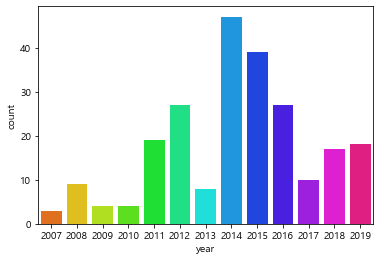

In [13]:
sns.barplot(x='year', y='count', data=per_year, palette='hsv')

## 1-1) Stack bar plot - 연도별 + 세부 카테고리
### 카테고리마다 연도별로 카운트한 다음 merge

In [14]:
mc = pd.DataFrame(musical['category'].groupby(musical['year']).value_counts())
mc = mc.rename(columns = {'category': 'musical'}).reset_index()

In [15]:
mc = mc[['year', 'musical']]

In [16]:
pc = pd.DataFrame(play['category'].groupby(play['year']).value_counts())
pc = pc.rename(columns = {'category': 'play'}).reset_index()
pc = pc[['year', 'play']]

In [17]:
mpc = mc.merge(pc, on='year', how='outer').fillna(0)

In [18]:
moc = pd.DataFrame(movie['category'].groupby(movie['year']).value_counts())
moc = moc.rename(columns = {'category': 'movie'}).reset_index()
moc = moc[['year', 'movie']]

In [19]:
mpmc = moc.merge(mpc, on='year', how='outer').fillna(0)

In [20]:
ec = pd.DataFrame(exhibit['category'].groupby(exhibit['year']).value_counts())
ec = ec.rename(columns = {'category': 'exhibit'}).reset_index()
ec = ec[['year', 'exhibit']]

In [21]:
mpmec = mpmc.merge(ec, on='year', how='outer').fillna(0)

In [22]:
cc = pd.DataFrame(concert['category'].groupby(concert['year']).value_counts())
cc = cc.rename(columns={'category':'concert'}).reset_index()
cc = cc[['year', 'concert']]

In [23]:
mpmecc = mpmec.merge(cc, on='year', how='outer').fillna(0)

In [24]:
fc = pd.DataFrame(festival['category'].groupby(festival['year']).value_counts())
fc = fc.rename(columns={'category':'festival'}).reset_index()
fc = fc[['year', 'festival']]

In [25]:
finalcount = mpmecc.merge(fc, on='year', how='outer').fillna(0)

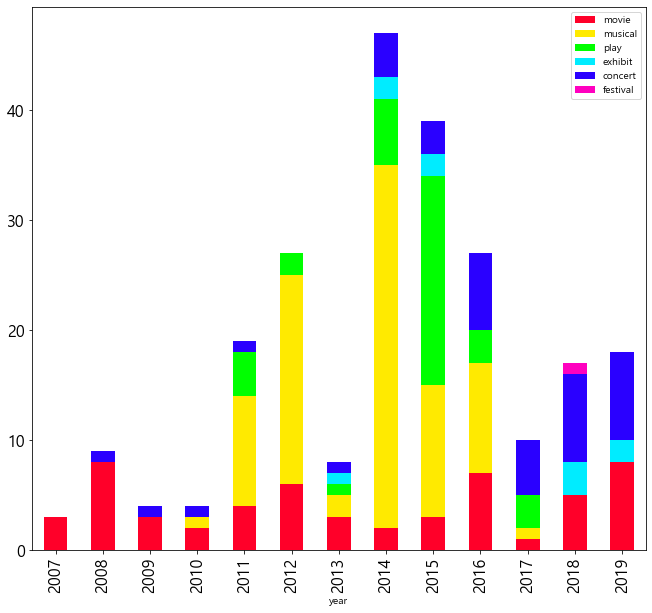

In [26]:
finalcount.plot.bar(x='year', stacked=True, colormap='gist_rainbow', figsize=(11, 10), fontsize=16)

## 2) 장소별 관람 횟수
1~2번 방문한 장소가 대부분이기 때문에 상위 10개의 공연장만 확인하기.

In [27]:
per_theater = pd.DataFrame(ticket['theater'].groupby(ticket['theater']).count().nlargest(10))
per_theater = per_theater.rename(columns={'theater':'count'}).reset_index()

In [28]:
per_theater

,theater,count
0,CGV 수원,18
1,두산아트센터 연강홀,18
2,충무아트센터 중극장 블랙,17
3,CGV 북수원,10
4,예스24스테이지 3관,10
5,세종M씨어터,9
6,대학로 아트원씨어터 1관,7
7,예스24스테이지 2관,6
8,올림픽공원 체조경기장,5
9,피엠씨대학로자유극장,5


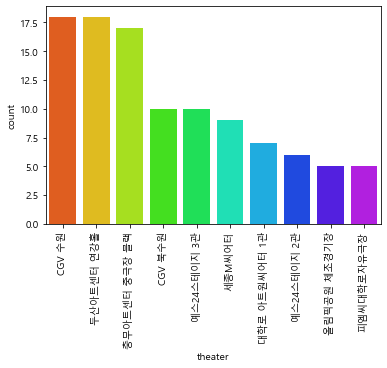

In [29]:
per_theater_chart = sns.barplot(x='theater', y='count', data=per_theater, palette='gist_rainbow')
per_theater_chart.set_xticklabels(per_theater['theater'], rotation='vertical')
per_theater_chart 

## 3) 공연별 관람 횟수
1~2번 봤던 공연이 다수이기 때문에 3번 이상 본 공연들만 카운트.

In [30]:
# 공연별 관람 횟수 확인
ticket['title'].groupby(ticket['title']).count().nlargest(15)

title
프라이드                 12
넥스트 투 노멀              9
살리에르                  9
사춘기                   8
쓰릴 미                  8
모범생들                  5
여신님이 보고 계셔            5
Frank Show 일단 드루와     4
블랙메리포핀스               4
뉴시즈                   3
스토리오브마이라이프            3
스프링 어웨이크닝             3
위드아웃유                 3
The Best Moments      2
X-INSPIRATION         2
Name: title, dtype: int64

In [31]:
per_title = pd.DataFrame(ticket['title'].groupby(ticket['title']).count().nlargest(13))
per_title = per_title.rename(columns={'title':'count'}).reset_index()

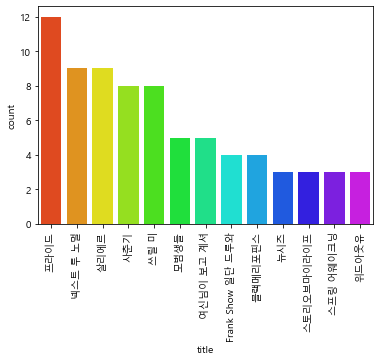

In [32]:
per_title_chart = sns.barplot(x='title', y='count', data=per_title, palette='gist_rainbow')
per_title_chart.set_xticklabels(per_title['title'], rotation='vertical')
per_title_chart

## 4) 콘서트 아티스트별 관람 횟수
2번 이상 본 아티스트만 카운트.

In [33]:
concert2['artist'].groupby(concert2['artist']).count().nlargest(15)

artist
DAY6              11
Jonghyun           3
SHINee             3
SORAN              3
Super Junior       3
BTS                2
various artist     2
EXO                1
Epik High          1
Fly To The Sky     1
GOT7               1
History Boys       1
Key                1
Lee Jinhyuk        1
NCT DREAM          1
Name: artist, dtype: int64

In [34]:
per_artist = pd.DataFrame(concert2['title'].groupby(concert2['artist']).count().nlargest(6))
per_artist = per_artist.rename(columns={'title':'count'})

In [35]:
# pie chart color로 사용할 colorlist
colorlist = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'orange']

In [36]:
per_artist

,count
artist,
DAY6,11
Jonghyun,3
SHINee,3
SORAN,3
Super Junior,3
BTS,2


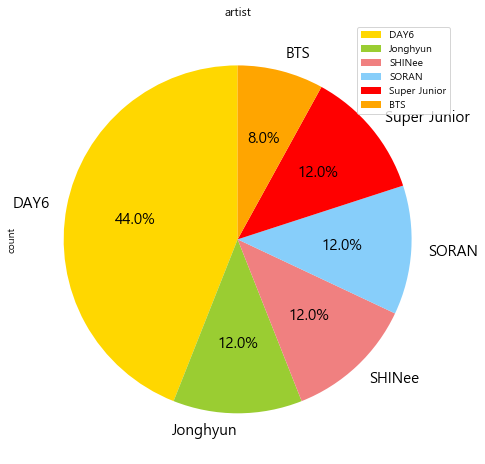

In [37]:
per_artist.plot(kind='pie', y='count', label='count', title='artist', colors=colorlist, autopct='%1.1f%%', startangle=90, figsize=(8, 8), fontsize=15)

# 2. 텅장의 범인을 찾아보자

## 1) 총 지출

In [38]:
total_p = ticket['price'].sum()
total_p

7649200

## 1-1) 총 지출에서 각 카테고리가 차지하는 비중

In [39]:
price_cate = pd.DataFrame(ticket['price'].groupby(ticket['category']).sum())
price_cate = price_cate.rename(columns={'price':'total_price'})
price_cate

,total_price
category,
concert,2773000
exhibit,65000
festival,50000
movie,419000
musical,3319300
play,1022900


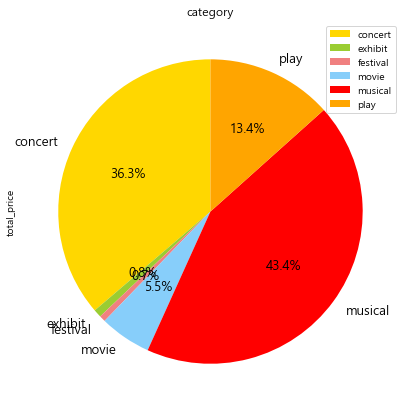

In [40]:
price_cate.plot(kind='pie', y='total_price', label='total_price', title='category', colors=colorlist, autopct='%1.1f%%', startangle=90, figsize=(7, 7), fontsize=13)

## 2) 단일 공연 중 가장 비싼 티켓

In [41]:
ticket.loc[ticket['price'].idxmax(), :]

category                concert
title                  T1001101
date        2019-03-15 00:00:00
theater            올림픽공원 핸드볼경기장
price                    121000
platform                  yes24
year                       2019
Name: 218, dtype: object

In [42]:
# 정렬해서 확인하기
ticket.sort_values(by=['price'], axis=0, ascending=False)

,category,title,date,theater,price,platform,year
218,concert,T1001101,2019-03-15,올림픽공원 핸드볼경기장,121000,yes24,2019
128,concert,SHINee WORLD 5,2016-09-04,올림픽공원 체조경기장,110000,yes24,2016
230,concert,GRAVITY,2019-08-11,잠실실내체육관,110000,yes24,2019
132,concert,X-INSPIRATION,2016-12-03,화정체육관,110000,yes24,2016
133,concert,X-INSPIRATION,2016-12-04,화정체육관,110000,yes24,2016
144,concert,Every DAY6 in December,2017-12-24,예스24 라이브홀,99000,yes24,2017
219,concert,Youth Encore,2019-03-31,올림픽공원 핸드볼경기장,99000,yes24,2019
214,concert,THE STORY by JONGHYUN,2015-10-02,코엑스아티움(CoexArtium),99000,yes24,2015
179,concert,PARADE,2014-11-15,블루스퀘어(Blue Square) 콘서트공연장,99000,interpark,2014
161,concert,The Present,2018-12-24,블루스퀘어(Blue Square) 콘서트공연장,99000,yes24,2018


## 3) 공연별로 티켓 가격 총합이 높은 순서

In [43]:
pd.DataFrame(ticket.groupby(['title'])['price'].sum().nlargest(10))

,price
title,
넥스트 투 노멀,470800
프라이드,382500
살리에르,363300
쓰릴 미,350000
사춘기,242000
X-INSPIRATION,220000
블랙메리포핀스,204000
The Best Moments,198000
Youth,198000


In [44]:
price_year = pd.DataFrame(ticket['price'].groupby(ticket['year']).sum())
price_year = price_year.reset_index()
price_year

,year,price
0,2007,17000
1,2008,96000
2,2009,88500
3,2010,152000
4,2011,564000
5,2012,909000
6,2013,127600
7,2014,1646300
8,2015,1186400
9,2016,1109400


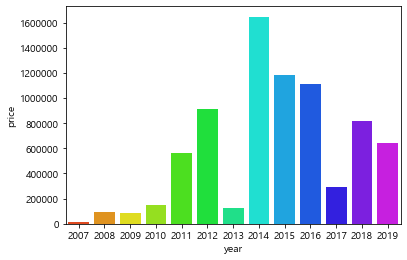

In [45]:
sns.barplot(x='year', y='price', data=price_year, palette='gist_rainbow')

# 3. 미래의 집 위치를 정해보자

## 공연장 데이터 불러오기

In [46]:
place = pd.read_csv('서울시 공연장 현황.csv')
place.head()

,연계시군구코드,인허가등록번호,등록일자,공연장명칭,공연장소재지(지번),전화번호,객석수,상태구분,영업상태,폐업일자,휴업시작일자,휴업종료일자
0,3110000,23000-1988-000008,19880728,매너티악단,서울특별시 은평구 진관동 6번지 3호,NaN,NaN,1,영업중,NaN,NaN,NaN
1,3240000,23000-2000-000003,20000616,한일시네마6관,서울특별시 강동구 성내동 48번지 1호,NaN,NaN,1,영업중,NaN,NaN,NaN
2,3110000,23000-1981-000002,19811209,퍼머스트레이디악단,서울특별시 은평구 진관동 479번지,NaN,NaN,1,영업중,NaN,NaN,NaN
3,3110000,23000-1982-000001,19820407,박추수악단,서울특별시 은평구 불광동 280번지 172호,NaN,NaN,1,영업중,NaN,NaN,NaN
4,3060000,23000-2002-000006,20020401,상봉시네마 2관,서울특별시 중랑구 상봉동 92번지 2호 3층 302호,6462-2300,NaN,1,영업중,NaN,NaN,NaN


In [47]:
# 필요한 column만 추출
place = place[['공연장명칭', '공연장소재지(지번)']]

In [48]:
# concat위해 Column 이름 변경
place.columns = ['theater', 'address']

In [49]:
place2 = pd.read_csv('myplace.csv')
place2.head(2)

,theater,address
0,해피씨어터,서울특별시 종로구 동숭동 1-60
1,대학로 배고파 씨어터,서울특별시 종로구 동숭동 128-16


In [50]:
place = pd.concat([place, place2], ignore_index=True)
place

,theater,address
0,매너티악단,서울특별시 은평구 진관동 6번지 3호
1,한일시네마6관,서울특별시 강동구 성내동 48번지 1호
2,퍼머스트레이디악단,서울특별시 은평구 진관동 479번지
3,박추수악단,서울특별시 은평구 불광동 280번지 172호
4,상봉시네마 2관,서울특별시 중랑구 상봉동 92번지 2호 3층 302호
5,상봉시네마 7관,서울특별시 중랑구 상봉동 92번지 2호 6층 601호
6,상봉시네마 3관,서울특별시 중랑구 상봉동 92번지 2호 4층 401호
7,상봉시네마 4관,서울특별시 중랑구 상봉동 92번지 2호 4층 402호
8,상봉시네마 5관,서울특별시 중랑구 상봉동 92번지 2호 5층 501호
9,상봉시네마 6관,서울특별시 중랑구 상봉동 92번지 2호 5층 502호


## ticket 데이터와 merge

In [51]:
ticketplace = ticket.merge(place, on='theater', how='inner')
ticketplace.sample(3)

,category,title,date,theater,price,platform,year,address
66,musical,Trace U,2012-11-16,컬처스페이스 엔유(Culture Space nu),35000,interpark,2012,서울특별시 종로구 동숭동 1번지 144호
152,play,프라이드,2014-09-20,대학로 아트원씨어터 2관,37500,interpark,2014,서울특별시 종로구 동숭동 1번지 181호 34층
39,play,모범생들,2015-07-30,피엠씨대학로자유극장,31500,interpark,2015,서울특별시 종로구 동숭동 1번지 45 호 자유빌딩 지2층


## Column 순서 바꾸기

In [52]:
cols = list(ticketplace)
cols.insert(3, cols.pop(cols.index('year')))
cols.insert(5, cols.pop(cols.index('address')))
cols

['category',
 'title',
 'date',
 'year',
 'theater',
 'address',
 'price',
 'platform']

In [53]:
ticketplace = ticketplace.loc[:, cols]
ticketplace.head(3)

,category,title,date,year,theater,address,price,platform
0,musical,락 오브 에이지,2010-09-15,2010,우리금융아트홀(올림픽역도경기장),서울특별시 송파구 방이동 88번지,70000,interpark
1,play,라이어,2011-05-09,2011,해피씨어터,서울특별시 종로구 동숭동 1-60,15000,interpark
2,musical,스프링 어웨이크닝,2011-06-08,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270번지,40000,interpark


## 지도에 마커로 표시

In [54]:
import folium
from folium import Map
from folium.map import Popup

import os
import requests

LOCATIONIQ_TOKEN = os.environ['KAKAO_REST_API_KEY']

from geocode import geocode

In [55]:
lats = []
lngs = []

for i, index in enumerate(ticketplace.index):
    lat, lng = geocode(ticketplace['address'][index])
    lats.append(lat)
    lngs.append(lng)

ticketplace = ticketplace.assign(lat=lats, lng=lngs)

ticketplace.head()

,category,title,date,year,theater,address,price,platform,lat,lng
0,musical,락 오브 에이지,2010-09-15,2010,우리금융아트홀(올림픽역도경기장),서울특별시 송파구 방이동 88번지,70000,interpark,37.521032,127.116167
1,play,라이어,2011-05-09,2011,해피씨어터,서울특별시 종로구 동숭동 1-60,15000,interpark,37.581893,127.002572
2,musical,스프링 어웨이크닝,2011-06-08,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270번지,40000,interpark,37.571899,127.001223
3,musical,스프링 어웨이크닝,2011-07-08,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270번지,42000,interpark,37.571899,127.001223
4,musical,스프링 어웨이크닝,2011-09-04,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270번지,40000,interpark,37.571899,127.001223


In [56]:
# 결측치 확인
ticketplace.isnull().sum()

category     0
title        0
date         0
year         0
theater      0
address      0
price        0
platform     0
lat         72
lng         72
dtype: int64

### 데이터 자체 문제로 geocoding이 적용되지 않았던 address 데이터 처리해보기

In [57]:
def change_address(x):
    x = x.replace('번지', '-').replace('호', '')
    return x

In [58]:
ticketplace['address'] = ticketplace['address'].apply(lambda x:change_address(x))

In [59]:
# geocoding 다시 시도
lats = []
lngs = []

for i, index in enumerate(ticketplace.index):
    lat, lng = geocode(ticketplace['address'][index])
    lats.append(lat)
    lngs.append(lng)

ticketplace = ticketplace.assign(lat=lats, lng=lngs)

ticketplace.isnull().sum()

category    0
title       0
date        0
year        0
theater     0
address     0
price       0
platform    0
lat         5
lng         5
dtype: int64

In [60]:
# 아직도 결측치가 존재하다니
ticketplace[ticketplace['lat'].isnull()]

,category,title,date,year,theater,address,price,platform,lat,lng
20,musical,셜록홈즈-앤더슨가의 비밀,2011-08-24,2011,대학로 티오엠2관,서울특별시 종로구 동숭동 1- 75 대학로문화공간 지하3층,28000,interpark,NaN,NaN
21,concert,뮤지컬 콘서트 집들이,2016-05-30,2016,대학로 티오엠2관,서울특별시 종로구 동숭동 1- 75 대학로문화공간 지하3층,45000,yes24,NaN,NaN
71,play,유럽블로그,2013-02-16,2013,대학로 티오엠1관,서울특별시 종로구 동숭동 1- 75,30000,interpark,NaN,NaN
139,movie,나는 전설이다,2007-12-25,2007,중앙극장 수원,주소없음,4000,jukine,NaN,NaN
230,concert,진혁해,2019-08-10,2019,경희대학교 평화의전당,서울특별시 동대문구 회기동 1,55000,interpark,NaN,NaN


대학로에는 이미 공연장이 많고, 중앙극장은 폐업했고, 평화의 전당은 한 번 갔으니 일단 제외하고 다음 과정을 진행하기로 하자!

### 마커 찍기

In [61]:
tp = ticketplace.dropna(axis=0)

In [62]:
# 카테고리별로 마커 색 다르게 찍기
# 이 방법이 최선일까
map = Map(location=[37.5, 127.1], zoom_start=10)

for i in tp.index:
    if tp['category'][i] == 'musical':
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='red')).add_to(map)
    elif tp['category'][i] == 'play':
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='purple')).add_to(map)
    elif tp['category'][i] == 'exhibit':
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='green')).add_to(map)
    elif tp['category'][i] == 'concert':
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='orange')).add_to(map)
    elif tp['category'][i] == 'movie':
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='blue')).add_to(map)
    else:
        lat = tp['lat'][i]
        lng = tp['lng'][i]
        name = tp['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='pink')).add_to(map)

map

## 좌표를 Scatter plot으로 표현

In [63]:
coordinates = tp[['lat', 'lng']]
coordinates

,lat,lng
0,37.521032,127.116167
1,37.581893,127.002572
2,37.571899,127.001223
3,37.571899,127.001223
4,37.571899,127.001223
5,37.571899,127.001223
6,37.571899,127.001223
7,37.571899,127.001223
8,37.571899,127.001223
9,37.571899,127.001223


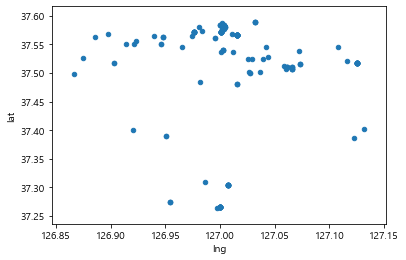

In [64]:
coordinates.plot.scatter(x='lng', y='lat')

## 중간 지점 찾기
1. 전체 데이터에서 하나뿐인 festival, 서울 시내 어디에서나 접근성이 높은 극장(movie)를 제외하고 musical, play, exhibit, concert 위치로 판단.  
2. outlier 제거를 위해 서울에 위치한 공연장만 가지고 계산.

In [65]:
tp2 = tp.copy()

In [66]:
tp2 = tp2[((tp2['category'] == 'musical') | (tp2['category'] =='play') | (tp2['category'] =='concert') | (tp2['category'] =='exhibit')) & (tp2['address'].str.contains('서울'))]

In [67]:
map2 = Map(location=[37.5, 127.1], zoom_start=11)

for i in tp2.index:
    if tp2['category'][i] == 'musical':
        lat = tp2['lat'][i]
        lng = tp2['lng'][i]
        name = tp2['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='red')).add_to(map2)
    elif tp2['category'][i] == 'play':
        lat = tp2['lat'][i]
        lng = tp2['lng'][i]
        name = tp2['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='purple')).add_to(map2)
    elif tp2['category'][i] == 'exhibit':
        lat = tp2['lat'][i]
        lng = tp2['lng'][i]
        name = tp2['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='green')).add_to(map2)
    else:
        lat = tp2['lat'][i]
        lng = tp2['lng'][i]
        name = tp2['theater'][i]
        marker = folium.Marker([lat, lng], popup=folium.Popup(name, max_width=300,min_width=50),
                           icon=folium.Icon(color='orange')).add_to(map2)

map2

### 1) 단순 중간 지점 찾기
데이터의 모든 위도, 경도를 더하고 전체 갯수로 나누기.

In [68]:
coor2 = tp2[['lat', 'lng']]
coor2.head(2)

,lat,lng
0,37.521032,127.116167
1,37.581893,127.002572


In [69]:
len_coor2 = len(coor2)
center_lat = sum(coor2['lat'])/len_coor2
center_lng = sum(coor2['lng'])/len_coor2
center_coor = [center_lat, center_lng]
center_coor

[37.55910144184329, 127.0182967917353]

In [70]:
# 지도에 마커 표시
marker = folium.Marker(center_coor,
                           icon=folium.Icon(color='black')).add_to(map2)

map2

### 2) 추가 outlier 제거
outlier로 작용할 것 같은 고척돔을 제외했을 때 중간 지점 구하기.

In [71]:
# 고척돔이 저장된 row 찾기
tp2[tp2['address'].str.contains('고척')]

,category,title,date,year,theater,address,price,platform,lat,lng
195,concert,The Elyxion,2017-11-25,2017,고척스카이돔,서울특별시 구로구 고척동 66-2,0,초대권,37.497379,126.866532


In [72]:
tp3 = tp2.drop([195])

In [73]:
# 잘 삭제되었는지 확인
tp3[tp3['address'].str.contains('고척')]

,category,title,date,year,theater,address,price,platform,lat,lng


In [74]:
coor3 = tp3[['lat', 'lng']]
coor3.head(2)

,lat,lng
0,37.521032,127.116167
1,37.581893,127.002572


In [75]:
len_coor3 = len(coor3)
center_lat3 = sum(coor3['lat'])/len_coor3
center_lng3 = sum(coor3['lng'])/len_coor3
center_coor3 = [center_lat3, center_lng3]
center_coor3

[37.55946666309622, 127.01919480942766]

In [76]:
marker = folium.Marker(center_coor3,
                           icon=folium.Icon(color='cadetblue')).add_to(map2)

map2

고척돔의 영향은 크지 않은 것 같다!

### 3) 시기별 가중치 반영
각각 비중이 높은 카테고리를 기준으로 (1) 2007-2010, (2) 2011-2016, (3) 2017-2019의 시기로 구분.  
임의로 각각 1, 3, 5배의 가중치를 두어 이를 반영한 중간 지점 구해보기.

In [77]:
tp4 = tp3.copy()

#### 시기별로 나눠서 별도 변수에 저장

In [78]:
tp2007 = tp4[(tp4['year'] >= 2007) & (tp4['year'] <= 2010)]
tp2007

,category,title,date,year,theater,address,price,platform,lat,lng
0,musical,락 오브 에이지,2010-09-15,2010,우리금융아트홀(올림픽역도경기장),서울특별시 송파구 방이동 88-,70000,interpark,37.521032,127.116167
143,concert,SUPER SHOW 3,2010-08-14,2010,올림픽공원 체조경기장,서울특별시 송파구 방이동 88-2,77000,gmarket,37.517754,127.125609
148,concert,SUPER SHOW,2008-02-24,2008,올림픽공원 핸드볼경기장,서울특별시 송파구 방이동 88-2,55000,auction,37.517754,127.125609
149,concert,SUPER SHOW 2,2009-07-18,2009,올림픽공원 핸드볼경기장,서울특별시 송파구 방이동 88-2,77000,gmarket,37.517754,127.125609


In [79]:
tp2011 = tp4[(tp4['year'] >= 2011) & (tp4['year'] <= 2016)]
tp2011

,category,title,date,year,theater,address,price,platform,lat,lng
1,play,라이어,2011-05-09,2011,해피씨어터,서울특별시 종로구 동숭동 1-60,15000,interpark,37.581893,127.002572
2,musical,스프링 어웨이크닝,2011-06-08,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,40000,interpark,37.571899,127.001223
3,musical,스프링 어웨이크닝,2011-07-08,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,42000,interpark,37.571899,127.001223
4,musical,스프링 어웨이크닝,2011-09-04,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,40000,interpark,37.571899,127.001223
5,musical,넥스트 투 노멀,2011-12-22,2011,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,30000,interpark,37.571899,127.001223
6,musical,넥스트 투 노멀,2012-02-09,2012,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,90000,clip service,37.571899,127.001223
7,musical,모비딕,2012-04-28,2012,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,39000,interpark,37.571899,127.001223
8,musical,여신님이 보고 계셔,2014-06-22,2014,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,0,초대권,37.571899,127.001223
9,musical,여신님이 보고 계셔,2014-07-01,2014,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,30000,interpark,37.571899,127.001223
10,musical,여신님이 보고 계셔,2014-07-03,2014,두산아트센터 연강홀,서울특별시 종로구 연지동 270-,30000,interpark,37.571899,127.001223


In [80]:
tp2017 = tp4[(tp4['year'] >= 2017) & (tp4['year'] <= 2019)]
tp2017

,category,title,date,year,theater,address,price,platform,lat,lng
49,play,킬미나우,2017-07-11,2017,충무아트센터 중극장 블랙,서울특별시 중구 흥인동 126- 1,30000,interpark,37.565450,127.015149
81,play,동행 - 나미야 잡화점의 기적,2017-02-10,2017,예스24스테이지 1관,서울특별시 종로구 동숭동 1- 52,10000,interpark,37.582761,127.003270
99,concert,The Present,2018-12-24,2018,블루스퀘어(Blue Square) 콘서트공연장,서울특별시 용산구 한남동 727- 56,99000,yes24,37.540703,127.002648
146,concert,THE SHINING,2018-09-02,2018,올림픽공원 체조경기장,서울특별시 송파구 방이동 88-2,77000,yes24,37.517754,127.125609
147,concert,KEEP SPINNING,2019-06-15,2019,올림픽공원 체조경기장,서울특별시 송파구 방이동 88-2,0,초대권,37.517754,127.125609
150,concert,T1001101,2019-03-15,2019,올림픽공원 핸드볼경기장,서울특별시 송파구 방이동 88-2,121000,yes24,37.517754,127.125609
151,concert,Youth Encore,2019-03-31,2019,올림픽공원 핸드볼경기장,서울특별시 송파구 방이동 88-2,99000,yes24,37.517754,127.125609
153,play,프라이드,2017-04-02,2017,대학로 아트원씨어터 2관,서울특별시 종로구 동숭동 1- 181 34층,33000,interpark,37.580267,127.003949
187,concert,L.O.V.E & DREAM,2017-08-26,2017,화정체육관,서울특별시 성북구 안암동5가 1-2,44000,melon,37.588750,127.032373
188,concert,You made my day,2018-09-08,2018,화정체육관,서울특별시 성북구 안암동5가 1-2,35000,yes24,37.588750,127.032373


In [81]:
coor2007 = tp2007[['lat', 'lng']]

In [82]:
coor2011 = tp2011[['lat', 'lng']]

In [83]:
coor2017 = tp2017[['lat', 'lng']]

In [84]:
lat_2007 = sum(coor2007['lat'])
lat_2011 = sum(coor2011['lat'])*3
lat_2017 = sum(coor2017['lat'])*5
lng_2007 = sum(coor2007['lng'])
lng_2011 = sum(coor2011['lng'])*3
lng_2017 = sum(coor2017['lng'])*5
len_2007 = len(coor2007)
len_2011 = len(coor2011)*3
len_2017 = len(coor2017)*5

In [85]:
center_lat4 = (lat_2007 + lat_2011 + lat_2017)/(len_2007 + len_2011 + len_2017)
center_lat4

37.557807832968365

In [86]:
center_lng4 = (lng_2007 + lng_2011 + lng_2017)/(len_2007 + len_2011 + len_2017)
center_lng4

127.02200701686526

In [87]:
center_coor4 = [center_lat4, center_lng4]
center_coor4

[37.557807832968365, 127.02200701686526]

In [88]:
marker = folium.Marker(center_coor4,
                           icon=folium.Icon(color='gray')).add_to(map2)

map2

별로 차이가 없다...! 가중치를 더 크게 주면 어떨까?

In [89]:
lat_20072 = sum(coor2007['lat'])
lat_20112 = sum(coor2011['lat'])*5
lat_20172 = sum(coor2017['lat'])*10
lng_20072 = sum(coor2007['lng'])
lng_20112 = sum(coor2011['lng'])*5
lng_20172 = sum(coor2017['lng'])*10
len_20072 = len(coor2007)
len_20112 = len(coor2011)*5
len_20172 = len(coor2017)*10

In [90]:
center_lat5 = (lat_20072 + lat_20112 + lat_20172)/(len_20072 + len_20112 + len_20172)
center_lat5

37.5569225980116

In [91]:
center_lng5 = (lng_20072 + lng_20112 + lng_20172)/(len_20072 + len_20112 + len_20172)
center_lng5

127.02365110666398

In [92]:
center_coor5 = [center_lat5, center_lng5]

marker = folium.Marker(center_coor5,
                           icon=folium.Icon(color='darkblue')).add_to(map2)

map2

점점 밑으로 내려오기는 하는데 큰 의미는 없어 보인다.

### 4) 최근 갔던 공연장에만 가중치 크게 두기

In [93]:
lat_20073 = sum(coor2007['lat'])
lat_20113 = sum(coor2011['lat'])
lat_20173 = sum(coor2017['lat'])*10
lng_20073 = sum(coor2007['lng'])
lng_20113 = sum(coor2011['lng'])
lng_20173 = sum(coor2017['lng'])*10
len_20073 = len(coor2007)
len_20113 = len(coor2011)
len_20173 = len(coor2017)*10

In [94]:
center_lat6 = (lat_20073 + lat_20113 + lat_20173)/(len_20073 + len_20113 + len_20173)
center_lat6

37.546129184175555

In [95]:
center_lng6 = (lng_20073 + lng_20113 + lng_20173)/(len_20073 + len_20113 + len_20173)
center_lng6

127.04477536975067

In [96]:
center_coor6 = [center_lat6, center_lng6]

marker = folium.Marker(center_coor6,
                           icon=folium.Icon(color='darkred')).add_to(map2)

map2

가중치를 아주 세게 주었더니 뚝섬 근처까지 내려왔다.

### 5) MarkerCluster 사용하기

In [97]:
from folium import plugins

popups = [str(i) for i in range(len_coor2)]

plugins.MarkerCluster(coor2, popups = popups).add_to(map2)

map2

신기해서 사용하긴 했는데 마커에 몇 개의 데이터가 저장되어있는지 알 수 있는 것 외에는 크게 의미있는 것 같지는 않다.

# 겪었던 시행착오

#### 1. 같은 공연장이어도 티켓마다 이름이 다른 경우 있음  

#### 2. 공연장이 없어지거나 이름 바뀜, 극장도 CGV에서 메가박스 등으로 바뀐 경우 있음  
-> 직접 데이터를 추가해서 분석했음  

#### 3. locationIQ를 사용해서 geocoding을 했을 경우 잘못된 좌표를 잡는 경우 발생 ex. 좌표가 북한에도 찍힘... 
-> KAKAO API로 바꿨더니 잘 찍힘  

#### 4. 공연장 공공데이터 자체에 상세 주소 누락으로 API를 통한 geocoding이 안 되는 경우 다수 발생 (약 70개 정도의 누락)  
-> 상세 주소의 형식이 'n번지 m호'인 것이 문제였기 때문에 전처리를 통해 대부분의 결측치는 해결함.  

#### 5. 할인받은 내역과 금액을 구하고 싶었으나 패턴화하기에는 할인명이 특이한 경우가 많았음
-> 같은 프리뷰할인이라도 프리뷰, 조기예매, 얼리버드 등등 이름이 다르거나 / 학생할인도 학생, 직장인, 청소년, 대학생 등등으로 세분화되었거나 / 벨리핀치, 개띠할인 등

#### 6. 중간 지점은 어떻게 찾는 것이 맞을까?
    1. 가장 멀리 떨어진 공연장들의 중간 지점
    2. 밀집된 공연장들을 하나로 묶어서 다른 지점들과 중간 지점 찾기 등

# 추가로 하고 싶었던 것

1. 공연 소개글 크롤링을 통해 내가 봤던 공연들의 키워드 분석 -> 공연 소개는 대부분 이미지 형태로 되어있기 때문에 어려움이 있음.

2. 어떤 아티스트를 가장 많이 봤을까 -> 연극, 뮤지컬, 영화로 확대. 출연진이 많은 경우 기준을 어떻게 잡을 것인가?

3. 지하철, 버스 노선도 데이터도 가져와서 교통까지 고려한 중간 지점 찾기.

4. 상세주소(구, 동 단위)로 묶어서 중간 지점 알아보기.